# Grup Ödevi #1
FIZ371 - Bilimsel ve Teknik Hesaplamalar | Teslim Tarihi: 23/03/2021

## Central Limit Theorem
Elinizde aşağıdaki olasılık dağılımına uygun şekilde sonuçlar veren hileli bir zar var:

In [23]:
import numpy as np
p = np.array([8,4,2,1,5,7]) # Ağırlıklar
p = p/np.sum(p) # Normalize ediyoruz
print(("Ağırlıklar: \n"+"{:.3f} "*6).format(*p))

Ağırlıklar: 
0.296 0.148 0.074 0.037 0.185 0.259 


In [26]:
p
x = np.arange(6)
print(x)
np.dot(p,x)

[0 1 2 3 4 5]


2.444444444444444

1. Bu dağılımı kullanarak 1000 atış yapın, bu atışın histogramını hesaplatın çizdirin.
2. 1000 atışta elde ettiğiniz sayıların ortalamasını hesaplatın.
3. Her seferinde 1000 atış olmak üzere, 10000 deneme yapın, her denemede gelen 1000 sayının ortalamasını hesaplayıp, `ortalamalar` isimli bir diziye atın (örneğin ortalamalar dizisinin 7896. elemanı, 7896. kez 1000 atış yaptığınızda gelen 1000 sayının ortalama değerini içeriyor olacak).
4. `ortalamalar` dizisinin histogramını hesaplatıp 10, 50 ve 100 kutu için çizdirin.

**Bonus** 4. adımda oluşturduğunuz histogramları Gaussyenlere fit edin.

## Çözüm
Bu iş için en uygunu [Olasılıklar](https://github.com/emresururi/FIZ371/blob/main/FIZ371_LN02_EST_Probabilities.ipynb) ders notlarında da gördüğümüz `random.choice()` metodunu kullanmak ama tabii ki yüzlerce farklı şekilde çözülebilir.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spstats

In [3]:
N = 1000
p = np.array([8,4,2,1,5,7])
p = p/np.sum(p)
data = np.random.choice(6,size=(N),p=p)
print("Mean of the {:} sample: {:.5f}".format(N,np.mean(data)))

Mean of the 1000 sample: 2.36800


In [4]:
np.histogram(data)

(array([313,   0, 140,   0,  94,   0,  17,   0, 191, 245]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]))

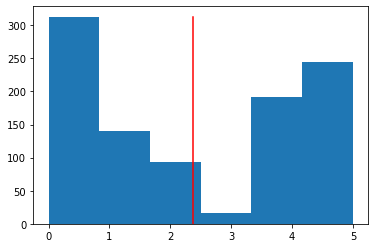

In [5]:
hist_data = plt.hist(data,bins=6)
data_mean = np.mean(data)
plt.plot([data_mean,data_mean],[0,np.max(hist_data[0])],"r-")
plt.show()

Şeklinde, bir çalıştırmanın sonucunu görebiliyoruz. Yukarıdaki figürde kırmızı çizgi ortalamayı temsil ediyor.

Bunu 10000 kere çalıştırmak için fonksiyonlaştırmak pratik olacaktır:

In [6]:
def mean_of_N_times_roll_of_p(N,p):
    # Given the probability weight p, 
    # Picks N samples, returns the mean
    list_picked = np.random.choice(len(p),size=(N),p=p)
    return np.mean(list_picked)

In [17]:
# print(p)
mean_of_N_times_roll_of_p(1000,p)

2.362

10000 kere çalıştıralım:
(geçen süreyi hesaplamak için de `time` modülünü kullanıyoruz)

In [8]:
import time

In [19]:
NN = 100000

N = 1000
p = np.array([8,4,2,1,5,7])
p = p/np.sum(p)

means = []
start = time.perf_counter()
for i in range(NN):
    means.append(mean_of_N_times_roll_of_p(N,p))

finish = time.perf_counter()
print("\nFinished in {:.2f} seconds.".format(finish-start))


Finished in 6.82 seconds.


Bilgileri alalım:

In [21]:
print("{:} samples picked {:} times.\n".format(N,NN))
print(("Means of each pick goes like "+"{:.3f}, "*5+"...")\
      .format(*means[:5]))
print("Means of means     : {:.5f}".format(np.mean(means)))
print("Variance of means  : {:.5f}".format(np.var(means)))
print("Std. dev. of means : {:.5f}".format(np.std(means)))

1000 samples picked 100000 times.

Means of each pick goes like 2.424, 2.438, 2.336, 2.443, 2.302, ...
Means of means     : 2.44419
Variance of means  : 0.00422
Std. dev. of means : 0.06493


In [20]:
len(means)

100000

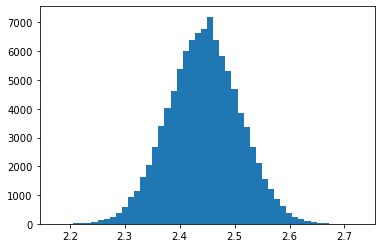

In [27]:
hist_values = plt.hist(means,bins=50)
plt.show()

In [30]:
print(hist_values)
print(hist_values [1][2]- hist_values[1][1])

(array([2.000e+00, 4.000e+00, 6.000e+00, 1.100e+01, 2.500e+01, 3.100e+01,
       6.700e+01, 1.210e+02, 1.630e+02, 2.330e+02, 3.910e+02, 5.980e+02,
       9.490e+02, 1.145e+03, 1.614e+03, 2.060e+03, 2.657e+03, 3.404e+03,
       4.033e+03, 4.618e+03, 5.380e+03, 6.002e+03, 6.395e+03, 6.641e+03,
       6.760e+03, 7.200e+03, 6.374e+03, 5.842e+03, 5.319e+03, 4.699e+03,
       3.840e+03, 3.381e+03, 2.679e+03, 2.118e+03, 1.570e+03, 1.202e+03,
       8.510e+02, 6.120e+02, 3.800e+02, 2.490e+02, 1.610e+02, 8.000e+01,
       5.600e+01, 3.400e+01, 2.100e+01, 7.000e+00, 5.000e+00, 5.000e+00,
       4.000e+00, 1.000e+00]), array([2.173  , 2.18408, 2.19516, 2.20624, 2.21732, 2.2284 , 2.23948,
       2.25056, 2.26164, 2.27272, 2.2838 , 2.29488, 2.30596, 2.31704,
       2.32812, 2.3392 , 2.35028, 2.36136, 2.37244, 2.38352, 2.3946 ,
       2.40568, 2.41676, 2.42784, 2.43892, 2.45   , 2.46108, 2.47216,
       2.48324, 2.49432, 2.5054 , 2.51648, 2.52756, 2.53864, 2.54972,
       2.5608 , 2.57188, 2.58296, 

Gaussian'a fit etmek için öncelikle yukarıdaki figürün alanını hesaplıyoruz, Gaussian'ın alanı normalize olduğundan, o alanla Gaussian'ı çarpıyoruz:

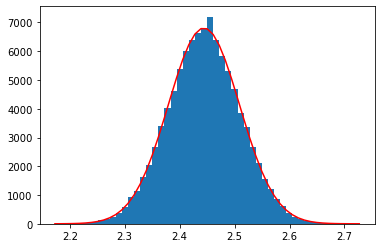

In [31]:
# Fit it to a Gaussian:

n_bins = 100
#dx = (-np.min(means)+np.max(means))/n_bins
dx_hist = hist_values[1][1] - hist_values[1][0]
integral = dx_hist*np.sum(hist_values[0])

plt.hist(means,bins=50)
plt.plot(hist_values[1],integral*spstats.norm.pdf\
         (hist_values[1],np.mean(means),np.std(means)),"r-")
plt.show()

Yukarıda Gaussian'ın merkezini ($\mu$) ve dağılımını ($\sigma$) doğrudan veriler üzerinden hesapladığımıza dikkat edin.

## Oyun Teorisi
### Mahkûmun İkilemi (Prisoner's Dilemma)
Prisoner's Dilemma oyunu için ödül tablosundaki değerleri kullanarak mahkûmların biri için:
1. Ele verme ve sessiz kalma ihtimalini hesaplayın.
2. İkisinin de birbirini ele vermelerinin ihtimalini hesaplayın.
3. Beklenen (ortalama) ödül değerini hesaplayın.

### Çözüm
Mahkûmun İkilemi oyunu için kazanç tablosunu gözden geçirelim:


|    | Bs  | Bd  |
|----|-----|-----|
| **As** | 2,2 | 0,3 |
| **Ad** | 3,0 | 1,1 |

Bu tabloya bakarak denklemlerimizi oluşturursak:

$$A_s = \frac{2.B_s + 0.B_d}{2.B_s + 0.B_d+3.B_s+1.B_d}=\frac{2B_s}{4B_s + 1}$$


$$A_d = \frac{3.B_s + 1.B_d}{2.B_s + 0.B_d+3.B_s+1.B_d}=\frac{2B_s+1}{4B_s + 1}$$


$$B_s = \frac{2.A_s + 0.A_d}{2.A_s + 0.A_d+3.A_s+1.A_d}=\frac{2A_s}{4A_s + 1}$$


$$B_d = \frac{3.A_s + 1.A_d}{2.A_s + 0.A_d+3.A_s+1.A_d}=\frac{2A_s+1}{4A_s + 1}$$

Tabii bir de, her mahkûm için iki olasılık olduğundan:

$$A_s+A_d = B_s + B_d = 1$$

doğal şartı var (yukarıdaki denklemlerde pay ve paydaları sadeleştirirken açık açık belirtmeden, otomatik olarak kullandık bile ;).

Denklemler lineer değiller ve $A_s$ $B_s$ ile, $A_d$ de $B_d$ ile fena halde çiftlenmiş (_coupled_) durumdalar. Nasıl çözeceğiz?


Çözüm için matematikten dışarı bir adım atıp, kafamızı ve yorumlama yeteneğimizi ("muhakeme kabiliyetimizi") kullanacağız. Ödül tablosu açık bir şekilde simetrik. Bunun sebebi A mahkûmu ile B mahkûmu arasında bir fark olmaması. İkisi de benzer şartlarda, benzer durumda. Bu sebepten dolayı ikisinin de sessiz kalma veya ele verme ihtimalleri birbirlerine eşit olmalı (yani $A_s = B_s$ ve $A_d = B_d$)!

Bu durumu gözümüzde daha iyi canlandırabilmek için, birbirinin aynı iki tane hileli paramız olduğunu varsayalım. Diyelim ki iki para da 1/4 ihtimalle yazı, 3/4 ihtimalle tura geliyor. Bu durumda, hangi parayı ele alıp attığımızın bir farkı olmaz.

Bu yeni denklemle donanmış olarak tekrardan ilk denklemimizi yazalım:

$$A_s = \frac{2B_s}{4B_s + 1} \rightarrow A_s=  \frac{2A_s}{4A_s + 1}\Rightarrow \boxed{A_s = \frac{1}{4}}$$

Böylelikle:

$$ A_s = B_s = \frac{1}{4}$$

$$ A_d = B_d = \frac{3}{4}$$

şeklinde olasılıklar bulunmuş olur.

<hr>
<div class="alert alert-block alert-info">
    <h4> Alternatif Yöntem</h4>
Derste sevgili Uğur'un önerdiği şekilde, matematiğin içinde kalarak da çözmemiz mümkün (ama hiç eğlenceli değil açıkçası):

1\. denklemde $B_s$ gördüğümüz yere 3. denklemdeki $A_s$ karşılığını yazalım:

$$B_s =\frac{2A_s}{4A_s + 1}\rightarrow A_s = \frac{2B_s}{4B_s + 1} = \frac{2 \left(\frac{2A_s}{4A_s + 1}\right)}{4\left(\frac{2A_s}{4A_s + 1}\right)+1}$$



Bunu açıp dağıttığımızda:
$$A_s =  \frac{ \frac{4A_s}{4A_s + 1}}{\frac{8A_s}{4A_s + 1}+\frac{4A_s + 1}{4A_s + 1}}=\frac{4A_s}{8A_s+(4A_s+1)}=\frac{4A_s}{12A_s+1}$$

içler-dışlar çarpımından:

\begin{gather*}
12A_s^2+A_s = 4A_s\\
12A_s + 1 = 4\\
12A_s =3\\
\boxed{A_s = \frac{1}{4}}
\end{gather*}

bulunur.
    </div>
<hr>

İkisinin de karşılıklı olarak birbirini ele vermelerinin ihtimaline gelirsek:

$$P_d = A_d B_d = \frac{3}{4}\cdot\frac{3}{4}=\frac{9}{16}$$

Beklenen ödül(/kazanç) değeri ise:

\begin{align*} E_A &= A_s B_s E_A(a_s\wedge b_s) +A_s B_d E_A(a_s\wedge b_d)\\
&+A_d B_s E_A(a_d\wedge b_s) +A_d B_d E_A(a_d\wedge b_d)\\
&=\frac{1}{4}\cdot\frac{1}{4}\cdot 2+\frac{1}{4}\cdot\frac{3}{4}\cdot 0+\frac{3}{4}\cdot\frac{1}{4}\cdot 3+\frac{3}{4}\cdot\frac{3}{4}\cdot 1 =\frac{20}{16}=\frac{5}{4} \\&= 1.25 
\end{align*}

### Korsan Oyunu (Pirate Game)
[Korsan Oyunu'nun çözümünü](https://en.wikipedia.org/wiki/Pirate_game) çalışıp, anlayın.

### Prisonner's Dilemma, with memory
(Geçen seneden doğrudan alıntıladığımdan, İngilizce olarak veriyorum, siz Türkçe yazabilirsiniz tabii ki! 8)

Consider the prisoner's dilemma with the following pay-off table:


|    | Bs  | Bd  |
|----|-----|-----|
| **As** | 2,2 | 0,3 |
| **Ad** | 3,0 | 1,1 |

Instead of being a one-time only, thing, imagine where this process is repeated N times (N≫) and each of the players remembers what their opponent did in the previous rounds.

Device a strategy in the form of an algorithm so that it can be implemented into computer code and competed against the others strategies to find the winner.

Here are the limitations and features of the process:

1. The past responses of yours and your opponents will be stored in a (N×2) array (named arr_history) where each row is a past round, the 1st column is your response and the 2nd column being your opponent's response in that roung. You have access to this array anytime you want.
2. At the beginning of each round you and your opponent will be asked about your response for that round. Both of you will be uninformed about the other's response until the two responses are revealed at the same time.

This procedure will be repeated for N=10000 times. At the end, the winner will be decided by the points accumulated (the more points, the better). Your strategy will be competed against the others' in a league style face-off.